In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
customers = pd.read_csv("/content/Customers.csv")

In [3]:
products = pd.read_csv("/content/Products.csv")

In [4]:
transactions = pd.read_csv("/content/Transactions.csv")

In [5]:
print(customers.head())

  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15


In [6]:
print(products.head())

  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31


In [7]:
print(transactions.head())

  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070      P067  2024-03-21 15:10:10         3   

   TotalValue   Price  
0      300.68  300.68  
1      300.68  300.68  
2      300.68  300.68  
3      601.36  300.68  
4      902.04  300.68  


In [13]:
print(customers.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None


In [8]:
print(customers.describe())

       CustomerID      CustomerName         Region  SignupDate
count         200               200            200         200
unique        200               200              4         179
top         C0001  Lawrence Carroll  South America  2024-11-11
freq            1                 1             59           3


In [14]:
print(customers.isnull().sum())

CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64


In [9]:
print(products.describe())

            Price
count  100.000000
mean   267.551700
std    143.219383
min     16.080000
25%    147.767500
50%    292.875000
75%    397.090000
max    497.760000


In [12]:
print(products.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None


In [15]:
print(products.isnull().sum())

ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64


In [10]:
print(transactions.describe())

          Quantity   TotalValue       Price
count  1000.000000  1000.000000  1000.00000
mean      2.537000   689.995560   272.55407
std       1.117981   493.144478   140.73639
min       1.000000    16.080000    16.08000
25%       2.000000   295.295000   147.95000
50%       3.000000   588.880000   299.93000
75%       4.000000  1011.660000   404.40000
max       4.000000  1991.040000   497.76000


In [11]:
print(transactions.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 54.8+ KB
None


In [16]:
print(transactions.isnull().sum())

TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


In [17]:
customers['SignupDate']= pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate']= pd.to_datetime(transactions['TransactionDate'])

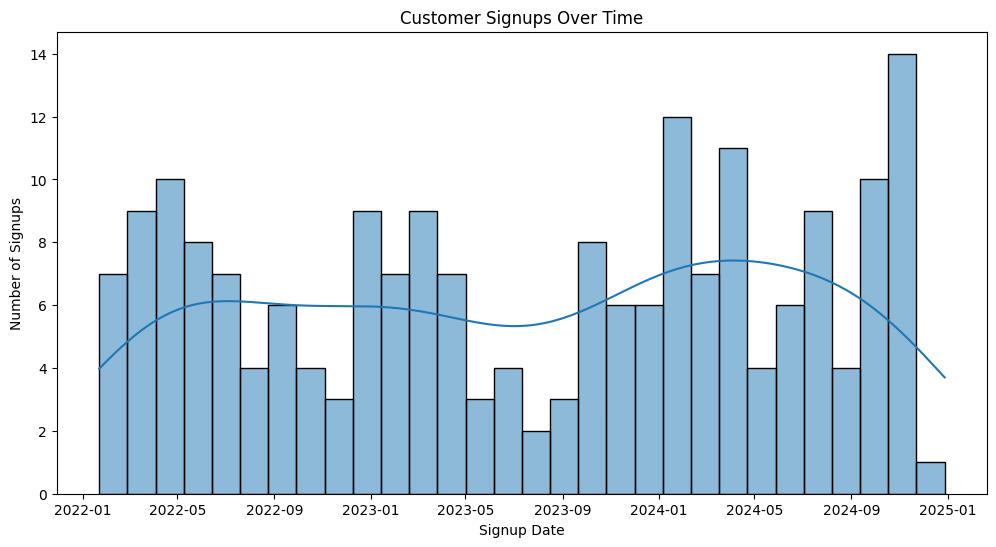

In [18]:
plt.figure(figsize=(12, 6))
sns.histplot(customers['SignupDate'], kde=True, bins=30)
plt.title('Customer Signups Over Time')
plt.xlabel('Signup Date')
plt.ylabel('Number of Signups')
plt.show()

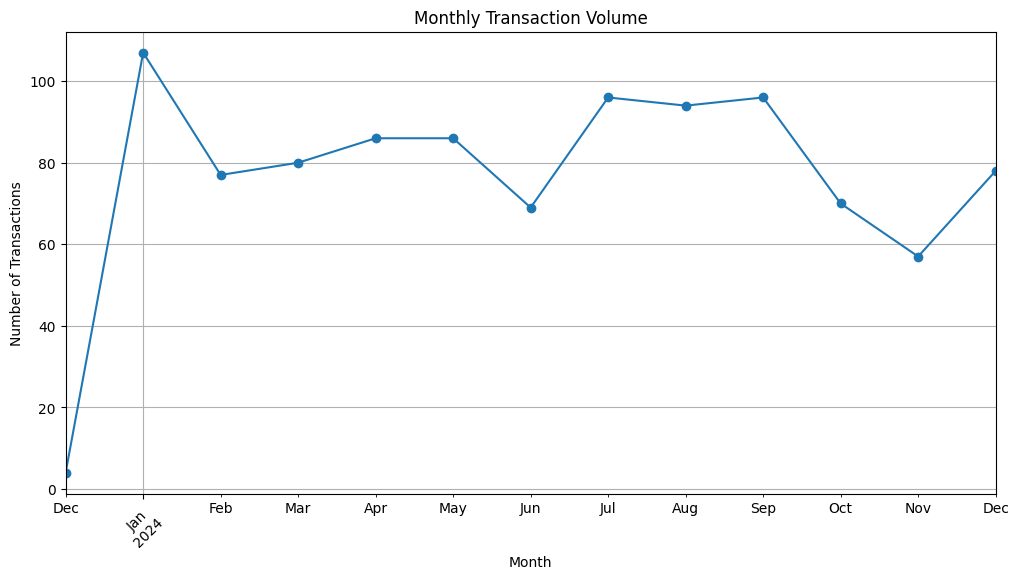

In [19]:
transactions['TransactionMonth'] = transactions['TransactionDate'].dt.to_period('M')
monthly_transactions = transactions.groupby('TransactionMonth').size()
plt.figure(figsize=(12, 6))
monthly_transactions.plot(kind='line', marker='o')
plt.title('Monthly Transaction Volume')
plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

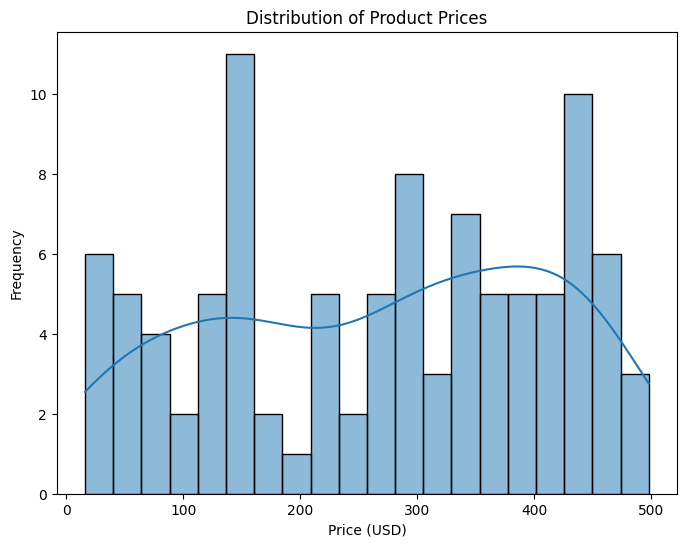

In [20]:
plt.figure(figsize=(8, 6))
sns.histplot(products['Price'], kde=True, bins=20)
plt.title('Distribution of Product Prices')
plt.xlabel('Price (USD)')
plt.ylabel('Frequency')
plt.show()

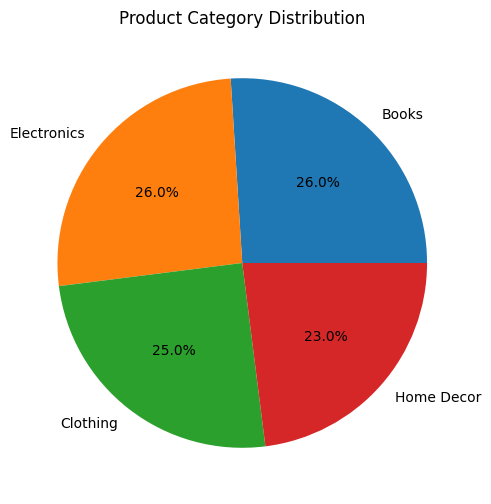

In [21]:
plt.figure(figsize=(10, 6))
products['Category'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Product Category Distribution')
plt.ylabel('')  # Hide default y-label
plt.show()

In [23]:
top_products = transactions['ProductID'].value_counts().head(10).index
top_products_data = products[products['ProductID'].isin(top_products)]
top_products_counts = transactions['ProductID'].value_counts().head(10)



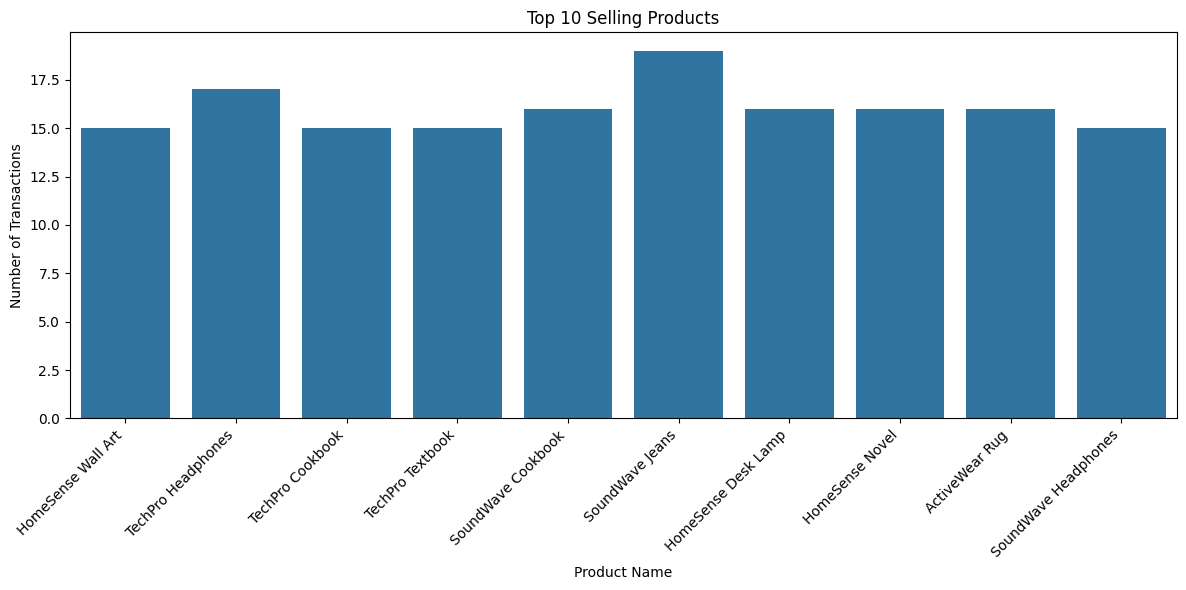

In [25]:
plt.figure(figsize=(12, 6))
top_products_counts = top_products_counts.reset_index()
top_products_counts.columns = ['ProductID', 'Count']
plot_data = pd.merge(top_products_data, top_products_counts, on='ProductID')
sns.barplot(x='ProductName', y='Count', data=plot_data)
plt.title('Top 10 Selling Products')
plt.xlabel('Product Name')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

In [26]:
top_products = transactions.groupby('ProductID')['Quantity'].sum().sort_values(ascending=False).head(10)
top_products = top_products.reset_index().merge(products, on='ProductID', how='left')
print(top_products)


  ProductID  Quantity            ProductName     Category   Price
0      P059        46        SoundWave Jeans     Clothing  303.20
1      P054        46     SoundWave Cookbook        Books   57.30
2      P029        45     TechPro Headphones  Electronics  433.64
3      P079        43         ActiveWear Rug   Home Decor  417.37
4      P061        43    HomeSense Desk Lamp   Home Decor  156.96
5      P057        43  ActiveWear Smartphone  Electronics  239.70
6      P048        43       TechPro Cookbook        Books  416.40
7      P062        39        HomeSense Novel        Books  374.16
8      P020        38      ActiveWear Jacket     Clothing  396.34
9      P028        38    HomeSense Desk Lamp   Home Decor  235.58


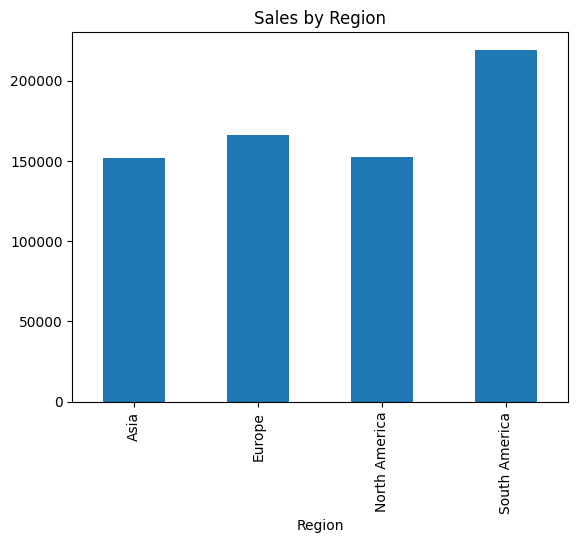

In [27]:
region_sales = transactions.merge(customers, on='CustomerID', how='left').groupby('Region')['TotalValue'].sum()
region_sales.plot(kind='bar', title='Sales by Region')
plt.show()
